# Sports Analytics - IPL

### Obejctive
To Scrape, Wrangle and Vidsualise IPL Data for Bowling Statistics obtained from https://www.iplt20.com

In [1]:
#install.packages("rvest")
#install.packages("magrittr")
#install.packages("glue")
#install.packages("polite")

In [2]:
#Importing Libraries
library(jsonlite) #For API
library(httr) #For API
library(tidyverse)
library(rvest) # To scrape data
library(purrr) # To work with lists and map functions
library(magrittr) # To handle pipes
library(stringr) # To handle strings
library(glue) # To paste strings
library(polite) # "polite" version of rvest
library(ggplot2) #To plot the data 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




In [3]:
#Indian Premiere League 2019 bolwing stats data of Top 100 highest wicket takers will be scraped for this assignment

#Reading URL to get the data
url_titles <- "https://www.iplt20.com/stats/2019/most-wickets"

#Reading the title
page_title <- read_html(url_titles)

In [4]:
# View the structure of the URL
page_title

{html_document}
<html lang="en">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="t-generic">\n    <script>\n\t(function(i,s,o,g,r,a,m){i['Goo ...

In [5]:
#View the structure of the data
page_title %>% typeof() 
page_title %>% glimpse()

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


In [6]:
#View the html structure of the data
page_title %>% html_structure() 

<html [lang]>
  <head>
    <meta [http-equiv, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [property, content]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [property, content]>
    <title>
      {text}
    <meta [property, content]>
    <meta [charset]>
    <meta [name, content]>
    <meta [name, content]>
    <meta [name, content]>
    <link [rel, href]>
    <script>
      {cdata}
    {comment}
    <script>
      {cdata}
    {comment}
    <script>
      {cdata}
    <link [href, rel]>
    <link [href, rel, type]>
    <link [rel, href]>
  <body.t-generic>
    {text}
    <script>
      {cdata}
    <div.top-bar.>
      {text}
      <ul.inline-list.top-bar__date-title.top-bar__date-title>
        <li.inline-list__item.>
          {text}
        {text}
      <ul.inline-list.top-bar__date.top-bar__date>
        <li.inline-list__item.>
          {text}
        {text}
      <ul.inline-list.top-bar__links.top-bar__links>
        <li.inline-list__

In [7]:
#Getting the link for all the top players
page_title %>%
  html_nodes(".top-players__player-link") 

{xml_nodeset (100)}
 [1] <a class="top-players__player-link" href="/teams/chennai-super-kings/squ ...
 [2] <a class="top-players__player-link" href="/teams/delhi-capitals/squad/16 ...
 [3] <a class="top-players__player-link" href="/teams/chennai-super-kings/squ ...
 [4] <a class="top-players__player-link" href="/teams/rajasthan-royals/squad/ ...
 [5] <a class="top-players__player-link" href="/teams/mumbai-indians/squad/11 ...
 [6] <a class="top-players__player-link" href="/teams/sunrisers-hyderabad/squ ...
 [7] <a class="top-players__player-link" href="/teams/kings-xi-punjab/squad/9 ...
 [8] <a class="top-players__player-link" href="/teams/royal-challengers-banga ...
 [9] <a class="top-players__player-link" href="/teams/sunrisers-hyderabad/squ ...
[10] <a class="top-players__player-link" href="/teams/chennai-super-kings/squ ...
[11] <a class="top-players__player-link" href="/teams/mumbai-indians/squad/21 ...
[12] <a class="top-players__player-link" href="/teams/chennai-super-kings/squ 

In [8]:
#Getting the name of players from url
ipl_df <- data_frame(
                     Name = page_title %>% 
                            html_nodes(".top-players__player-name") %>%
                            html_text())
head(ipl_df)

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Name
<chr>
Imran Tahir
Kagiso Rabada
Deepak Chahar
Shreyas Gopal
Jasprit Bumrah
Khaleel Ahmed


In [9]:
#Extracting the attributes from the html nodes
page_title %>%
  html_nodes(".top-players__player-name") %>%  
  html_attrs() %>%
  glimpse()

List of 100
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr(*, "names")= chr "class"
 $ : Named chr "top-players__player-name"
  ..- attr

In [10]:
#Getting the output as "character" type using map
page_title %>%
  html_nodes(".top-players__player-link") %>% 
  html_attrs() %>%
  map_chr("href")

[1] "/teams/chennai-super-kings/squad/898/imran-tahir"                
  [2] "/teams/delhi-capitals/squad/1664/kagiso-rabada"                  
  [3] "/teams/chennai-super-kings/squad/140/deepak-chahar"              
  [4] "/teams/rajasthan-royals/squad/1748/shreyas-gopal"                
  [5] "/teams/mumbai-indians/squad/1124/jasprit-bumrah"                 
  [6] "/teams/sunrisers-hyderabad/squad/2964/khaleel-ahmed"             
  [7] "/teams/kings-xi-punjab/squad/94/mohammad-shami"                  
  [8] "/teams/royal-challengers-bangalore/squad/111/yuzvendra-chahal"   
  [9] "/teams/sunrisers-hyderabad/squad/2885/rashid-khan"               
 [10] "/teams/chennai-super-kings/squad/103/harbhajan-singh"            
 [11] "/teams/mumbai-indians/squad/211/lasith-malinga"                  
 [12] "/teams/chennai-super-kings/squad/9/ravindra-jadeja"              
 [13] "/teams/kings-xi-punjab/squad/8/ravichandran-ashwin"              
 [14] "/teams/mumbai-indians/squad/2740/hardik-pandya"                  
 [15] "/teams/mumbai-indians/squad/3763/rahul-chahar"                   
 [16] "/teams/delhi-capitals/squad/38/ishant-sharma"                    
 [17] "/teams/sunrisers-hyderabad/squad/116/bhuvneshwar-kumar"          
 [18] "/teams/delhi-capitals/squad/836/chris-morris"                    
 [19] "/teams/mumbai-indians/squad/3183/krunal-pandya"                  
 [20] "/teams/sunrisers-hyderabad/squad/1112/sandeep-sharma"            
 [21] "/teams/delhi-capitals/squad/30/amit-mishra"                      
 [22] "/teams/rajasthan-royals/squad/3502/jofra-archer"                 
 [23] "/teams/chennai-super-kings/squad/25/dwayne-bravo"                
 [24] "/teams/royal-challengers-bangalore/squad/3824/navdeep-saini"     
 [25] "/teams/kolkata-knight-riders/squad/177/andre-russell"            
 [26] "/teams/delhi-capitals/squad/1113/axar-patel"                     
 [27] "/teams/kolkata-knight-riders/squad/203/sunil-narine"             
 [28] "/teams/kolkata-knight-riders/squad/76/piyush-chawla"             
 [29] "/teams/kings-xi-punjab/squad/2939/sam-curran"                    
 [30] "/teams/rajasthan-royals/squad/86/jaydev-unadkat"                 
 [31] "/teams/delhi-capitals/squad/3101/keemo-paul"                     
 [32] "/teams/sunrisers-hyderabad/squad/618/mohammad-nabi"              
 [33] "/teams/delhi-capitals/squad/3013/sandeep-lamichhane"             
 [34] "/teams/chennai-super-kings/squad/1745/shardul-thakur"            
 [35] "/teams/royal-challengers-bangalore/squad/59/umesh-yadav"         
 [36] "/teams/kolkata-knight-riders/squad/1737/harry-gurney"            
 [37] "/teams/royal-challengers-bangalore/squad/3840/mohammed-siraj"    
 [38] "/teams/kings-xi-punjab/squad/1276/hardus-viljoen"                
 [39] "/teams/royal-challengers-bangalore/squad/1735/moeen-ali"         
 [40] "/teams/sunrisers-hyderabad/squad/1086/siddarth-kaul"             
 [41] "/teams/rajasthan-royals/squad/101/dhawal-kulkarni"               
 [42] "/teams/mumbai-indians/squad/3098/alzarri-joseph"                 
 [43] "/teams/rajasthan-royals/squad/1154/ben-stokes"                   
 [44] "/teams/kings-xi-punjab/squad/3187/murugan-ashwin"                
 [45] "/teams/rajasthan-royals/squad/5146/oshane-thomas"                
 [46] "/teams/delhi-capitals/squad/969/trent-boult"                     
 [47] "/teams/mumbai-indians/squad/937/jason-behrendorff"               
 [48] "/teams/chennai-super-kings/squad/1903/mitchell-santner"          
 [49] "/teams/royal-challengers-bangalore/squad/2973/washington-sundar" 
 [50] "/teams/royal-challengers-bangalore/squad/180/dale-steyn"         
 [51] "/teams/kolkata-knight-riders/squad/261/kuldeep-yadav"            
 [52] "/teams/kolkata-knight-riders/squad/5105/prasidh-krishna"         
 [53] "/teams/rajasthan-royals/squad/1304/ish-sodhi"                    
 [54] "/teams/rajasthan-royals/squad/61/varun-aaron"                    
 [55] "/teams/mumbai-indians/squad/730/mitchell-mcclenaghan"

In [11]:
#Getting names of the players
Name <- page_title %>%
               html_nodes(".top-players__player-name") %>%
               html_text() 

In [12]:
#Getting overs bowled by the bowler
overs <- page_title %>%  
        html_nodes(".top-players__ov") %>%
        html_text() 

In [13]:
#Getting runs conceded by the bowler
runs <- page_title %>%  
        html_nodes(".top-players__r") %>%
        html_text() 

In [14]:
#Getting wickets taken by the bowler
wickets <- page_title %>%  
        html_nodes(".top-players__w") %>%
        html_text() 

In [15]:
#Getting bowler's bowling average
average <- page_title %>%  
        html_nodes(".top-players__a") %>%
        html_text() 

In [16]:
#Getting bowler's best bowling in an innings
best_bowling <- page_title %>%  
        html_nodes(".top-players__bbi") %>%
        html_text() 

In [17]:
#Getting bowler's economy rate
economy_rate <- page_title %>%  
        html_nodes(".top-players__e") %>%
        html_text() 

In [18]:
#Getting bowler's bowling strike rake 
strike_rate <- page_title %>%  
        html_nodes(".top-players__sr") %>%
        html_text() 

In [19]:
#Getting number of 4 wickets taken by the bowler
four_wickets <- page_title %>%  
        html_nodes(".top-players__4w") %>%
        html_text() 

In [20]:
#Getting number of 5 wickets taken by the bowler
five_wickets <- page_title %>%  
        html_nodes(".top-players__5w") %>%
        html_text() 

In [21]:
#Adding the extracted fields above into our created dataframe 
ipl_df <- data_frame(
                     Player_Name = Name,
                     Year = "2019",
                     #Slicing is done to omit ge the column name
                     Overs = overs[2:101],
                     Runs = runs[2:101],
                     Wickets = wickets[2:101],
                     Average = average[2:101],
                     Economy_Rate = economy_rate[2:101],
                     Best_Bowling = best_bowling[2:101],
                     Strike_Rate = strike_rate[2:101],
                     Four_Wickets = four_wickets[2:101],
                     Five_Wickets = five_wickets[2:101],
                    ) 
head(ipl_df)

Player_Name,Year,Overs,Runs,Wickets,Average,Economy_Rate,Best_Bowling,Strike_Rate,Four_Wickets,Five_Wickets
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Imran Tahir,2019,64.2,431,26,16.57,6.69,4/12,14.84,2,0
Kagiso Rabada,2019,47,368,25,14.72,7.82,4/21,11.28,2,0
Deepak Chahar,2019,64.3,482,22,21.90,7.47,3/20,17.59,0,0
Shreyas Gopal,2019,48,347,20,17.35,7.22,3/12,14.40,0,0
Jasprit Bumrah,2019,61.4,409,19,21.52,6.63,3/20,19.47,0,0
Khaleel Ahmed,2019,34.5,287,19,15.10,8.23,3/30,11.00,0,0


In [22]:
#Adding the link required to reach each and every players profile as a seperate column
ipl_df %<>%
  mutate(Link = page_title %>%
  html_nodes(".top-players__player-link") %>% 
  html_attr("href"))

In [23]:
#Getting link of the source URL for the player with highest wickets
url_link <- glue("https://www.iplt20.com{ipl_df$Link[1]}")
url_link

https://www.iplt20.com/teams/chennai-super-kings/squad/898/imran-tahir

In [24]:
#Getting the team name for which the highest wicket taker played
url_link %>%
  read_html() %>%
  html_nodes(".team-info h1") %>% 
  html_text()

[1] "Chennai Super Kings"

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

In [25]:
#Indian Premiere League 2017 bolwing stats data of Top 100 highest wicket takers is used to 
#compare the performances in consecutive ipl seasons
url_titles1 <- "https://www.iplt20.com/stats/2017/most-wickets"
page_title1 <- read_html(url_titles1)

In [26]:
#Getting name of the bowler
Name1 <- page_title1 %>%
               html_nodes(".top-players__player-name") %>%
               html_text()

In [27]:
#Getting overs bowled by the bowler
overs1 <- page_title1 %>%  
        html_nodes(".top-players__ov") %>%
        html_text() 

In [28]:
#Getting runs conceded by the bowler
runs1 <- page_title1 %>%  
        html_nodes(".top-players__r") %>%
        html_text() 

In [29]:
#Getting wickets taken by the bowler
wickets1 <- page_title1 %>%  
        html_nodes(".top-players__w") %>%
        html_text() 

In [30]:
#Getting bowler's bowling average
average1 <- page_title1 %>%  
        html_nodes(".top-players__a") %>%
        html_text() 

In [31]:
#Getting bowler's best bowling in an innings
best_bowling1 <- page_title1 %>%  
        html_nodes(".top-players__bbi") %>%
        html_text() 

In [32]:
#Getting bowler's economy rate
economy_rate1 <- page_title1 %>%  
        html_nodes(".top-players__e") %>%
        html_text() 

In [33]:
#Getting bowler's bowling strike rake 
strike_rate1 <- page_title1 %>%  
        html_nodes(".top-players__sr") %>%
        html_text() 

In [34]:
#Getting number of 4 wickets taken by the bowler
four_wickets1 <- page_title1 %>%  
        html_nodes(".top-players__4w") %>%
        html_text() 

In [35]:
#Getting number of 5 wickets taken by the bowler
five_wickets1 <- page_title1 %>%  
        html_nodes(".top-players__5w") %>%
        html_text() 

In [36]:
#Adding the extracted fields above into our created dataframe 
ipl_df1 <- data_frame(
                     Player_Name = Name1,
                     Year = "2017",
                     #Slicing is done to omit ge the column name
                     Overs = overs1[2:101],
                     Runs = runs1[2:101],
                     Wickets = wickets1[2:101],
                     Average = average1[2:101],
                     Economy_Rate = economy_rate1[2:101],
                     Best_Bowling = best_bowling1[2:101],
                     Strike_Rate = strike_rate[2:101],
                     Four_Wickets = four_wickets1[2:101],
                     Five_Wickets = five_wickets1[2:101],
                    ) 
head(ipl_df1)

Player_Name,Year,Overs,Runs,Wickets,Average,Economy_Rate,Best_Bowling,Strike_Rate,Four_Wickets,Five_Wickets
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Bhuvneshwar Kumar,2017,52.2,369,26,14.19,7.05,5/19,14.84,0,1
Jaydev Unadkat,2017,45.5,322,24,13.41,7.02,5/30,11.28,0,1
Jasprit Bumrah,2017,59.2,439,20,21.95,7.39,3/7,17.59,0,0
Mitchell McClenaghan,2017,54,507,19,26.68,9.38,3/24,14.40,0,0
Imran Tahir,2017,47,369,18,20.50,7.85,3/18,19.47,0,0
Rashid Khan,2017,54,358,17,21.05,6.62,3/19,11.00,0,0


In [37]:
ipl_merged_df <- merge(ipl_df,ipl_df1,by = "Player_Name")
ipl_merged_df

Player_Name,Year.x,Overs.x,Runs.x,Wickets.x,Average.x,Economy_Rate.x,Best_Bowling.x,Strike_Rate.x,Four_Wickets.x,⋯,Year.y,Overs.y,Runs.y,Wickets.y,Average.y,Economy_Rate.y,Best_Bowling.y,Strike_Rate.y,Four_Wickets.y,Five_Wickets.y
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Amit Mishra,2019,40,270,11,24.54,6.75,3/17,21.81,0,⋯,2017,38.5,343,10,34.30,8.83,3/11,19.80,0,0
Ankit Rajpoot,2019,16,152,3,50.66,9.50,2/33,32.00,0,⋯,2017,14,107,4,26.75,7.64,3/37,10.75,0,0
Avesh Khan,2019,3,30,0,-,10.00,0/30,-,0,⋯,2017,4,23,1,23.00,5.75,1/23,18.00,0,0
Axar Patel,2019,51,364,10,36.40,7.13,2/22,30.60,0,⋯,2017,48,362,15,24.13,7.54,3/11,21.60,0,0
Ben Cutting,2019,2,27,1,27.00,13.50,1/27,12.00,0,⋯,2017,12.4,123,1,123.00,9.71,1/41,30.00,0,0
Bhuvneshwar Kumar,2019,59,461,13,35.46,7.81,2/24,27.23,0,⋯,2017,52.2,369,26,14.19,7.05,5/19,14.84,0,1
Carlos Brathwaite,2019,3,29,0,-,9.66,0/13,-,0,⋯,2017,6,67,1,67.00,11.16,1/38,-,0,0
Chris Morris,2019,33,306,13,23.53,9.27,3/22,15.23,0,⋯,2017,31,240,12,20.00,7.74,4/26,21.33,1,0
Colin de Grandhomme,2019,5,55,0,-,11.00,0/12,-,0,⋯,2017,16,135,4,33.75,8.43,3/4,36.00,0,0


### Automating the Process


In [38]:
Most_Wickets <- function(year){
    selected_year <- str_replace_all(year," ","-")
    url <- glue("https://www.iplt20.com/stats/{selected_year}/most-wickets") 

    List_of_players <- url %>%
                       read_html() 
    
    Name2 <-  List_of_players %>%
                    html_nodes(".top-players__player-name")%>%
                    html_text()
    
    #Getting overs bowled by the bowler
    overs2 <- List_of_players %>%  
        html_nodes(".top-players__ov") %>%
        html_text() 
    
    #Getting runs conceded by the bowler
    runs2 <- List_of_players %>%  
        html_nodes(".top-players__r") %>%
        html_text()
    
    #Getting wickets taken by the bowler
    wickets2 <- List_of_players %>%  
        html_nodes(".top-players__w") %>%
        html_text() 
    
    #Getting bowler's bowling average
    average2 <- List_of_players %>%  
        html_nodes(".top-players__a") %>%
        html_text() 
    
    #Getting bowler's best bowling in an innings
    best_bowling2 <- List_of_players %>%  
        html_nodes(".top-players__bbi") %>%
        html_text() 
    
    #Getting bowler's economy rate
    economy_rate2 <- List_of_players %>%  
        html_nodes(".top-players__e") %>%
        html_text() 
    
    #Getting bowler's bowling strike rake 
    strike_rate2 <- List_of_players %>%  
        html_nodes(".top-players__sr") %>%
        html_text() 
    
    #Getting number of 4 wickets taken by the bowler
    four_wickets2 <- List_of_players %>%  
        html_nodes(".top-players__4w") %>%
        html_text() 

    #Getting number of 5 wickets taken by the bowler
    five_wickets2 <- List_of_players %>%  
        html_nodes(".top-players__5w") %>%
        html_text()
    
    #Adding the extracted fields above into our created dataframe 
    ipl_automated_df <- data_frame(
                     Season = year,
                     Player_Name = Name2,
                     #Slicing is done to omit the column name
                     Overs = overs2[2:101],
                     Runs = runs2[2:101],
                     Wickets = wickets2[2:101],
                     Average = average2[2:101],
                     Economy_Rate = economy_rate2[2:101],
                     Best_Bowling = best_bowling2[2:101],
                     Strike_Rate = strike_rate2[2:101],
                     Four_Wickets = four_wickets2[2:101],
                     Five_Wickets = five_wickets2[2:101],
                    ) 
                      
   return(ipl_automated_df)
}

In [39]:
#Randomly getting the Most Wickets data frame for the year "2013" 
Wickets2013 <- "2013" %>% Most_Wickets()
head(Wickets2013)  

Season,Player_Name,Overs,Runs,Wickets,Average,Economy_Rate,Best_Bowling,Strike_Rate,Four_Wickets,Five_Wickets
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2013,Dwayne Bravo,62.3,497,32,15.53,7.95,4/42,11.71,1,0
2013,James Faulkner,63.1,427,28,15.25,6.75,5/16,13.53,0,2
2013,Harbhajan Singh,70,456,24,19.00,6.51,3/14,17.50,0,0
2013,Mitchell Johnson,64,459,24,19.12,7.17,3/27,16.00,0,0
2013,Vinay Kumar,60.1,493,23,21.43,8.19,3/18,15.69,0,0
2013,Sunil Narine,64,350,22,15.90,5.46,4/13,17.45,2,0


### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

In [40]:
data <- head(Wickets2013)

Warning message:
“Use of `data$Runs` is discouraged. Use `Runs` instead.”
Warning message:
“Use of `data$Overs` is discouraged. Use `Overs` instead.”


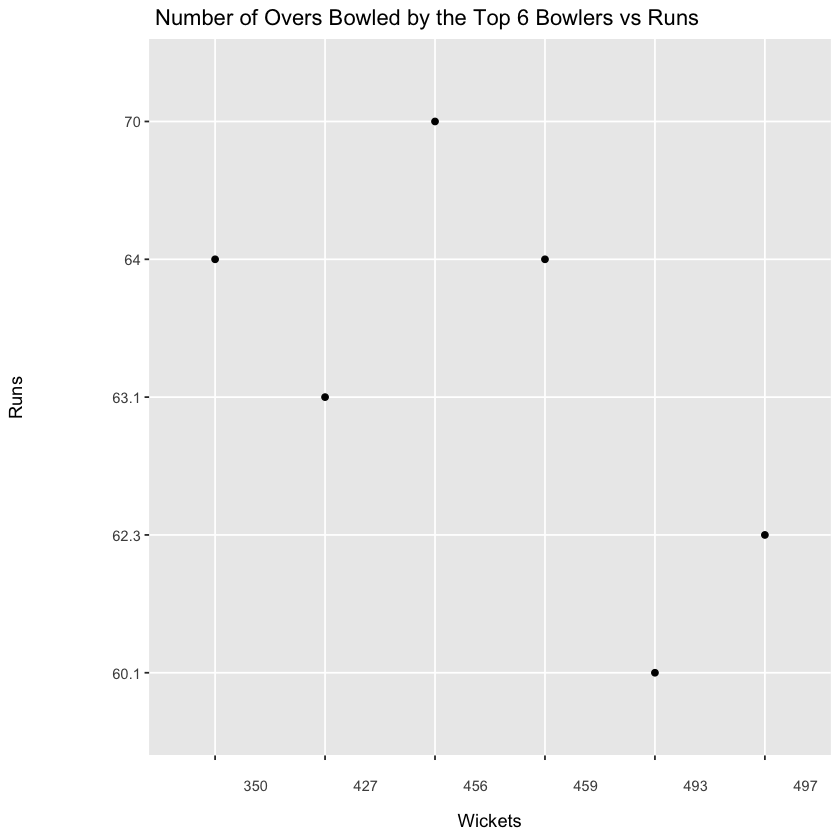

In [41]:
#Plotting the Number of Overs Bowled by the Top 6 Bowlers vs the runs given
data %>% 
  ggplot(mapping = aes( 
      x = data$Runs, 
      y = data$Overs)) +
  geom_point() + ggtitle(" Number of Overs Bowled by the Top 6 Bowlers vs Runs") +  xlab("Wickets") + ylab("Runs")

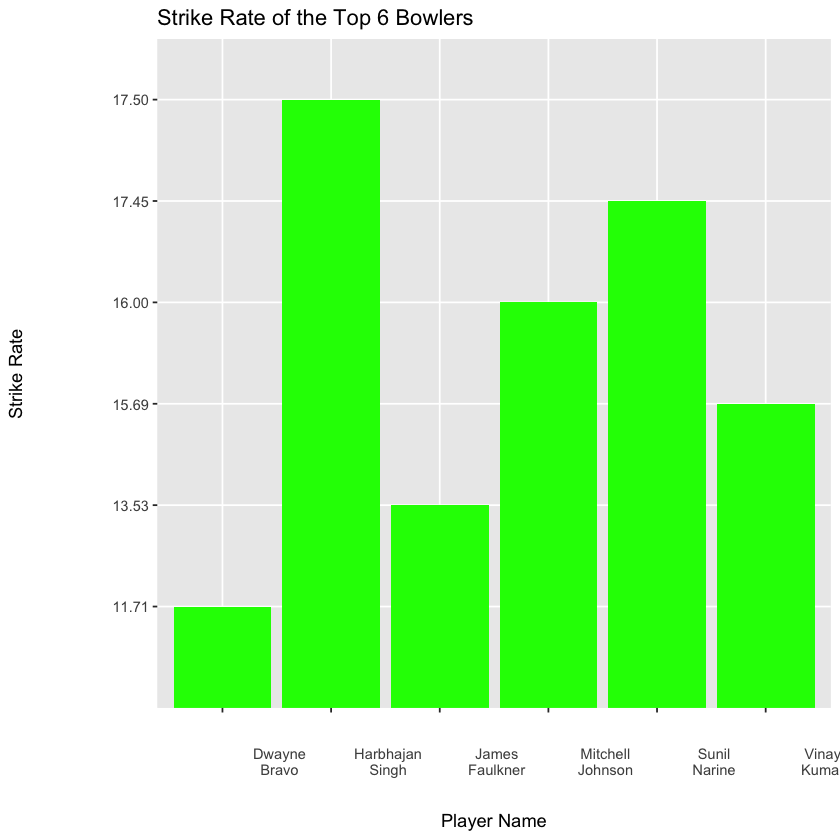

In [42]:
#Plotting the Strike Rate of the Top 6 Bowlers
ggplot(data,aes(Player_Name,Strike_Rate)) +
geom_col(fill='Green') + ggtitle("Strike Rate of the Top 6 Bowlers") + xlab('Player Name') + ylab('Strike Rate')

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

In [43]:
#Getting Username - My Favourite Data Science Youtuber Kenjee
username <- 'PlayingNumbers'

In [44]:
#Getting Endpoint
url_git <- 'https://api.github.com/'

#Getting Repository
repos <- GET(url = paste0(url_git,'users/',username,'/repos'))

In [45]:
#Responses
names(repos)

[1] "url"         "status_code" "headers"     "all_headers" "cookies"    
 [6] "content"     "date"        "times"       "request"     "handle"

In [46]:
#Checking Status Code
status_code(repos)

[1] 200

In [47]:
#Getting API Repository Content 
repo_content <- content(repos)

In [48]:
#Extracting the Name, Address and Commits from Repositories
repo_df <- lapply(repo_content, function(x) {
  df <- data_frame(repo        = x$name,
                   address     = x$html_url,
                   commits     = x$git_commits_url)
}) %>% bind_rows()

In [49]:
repo_df

repo,address,commits
<chr>,<chr>,<chr>
4PointLine,https://github.com/PlayingNumbers/4PointLine,https://api.github.com/repos/PlayingNumbers/4PointLine/git/commits{/sha}
Astros_Analysis,https://github.com/PlayingNumbers/Astros_Analysis,https://api.github.com/repos/PlayingNumbers/Astros_Analysis/git/commits{/sha}
ball_image_classifier,https://github.com/PlayingNumbers/ball_image_classifier,https://api.github.com/repos/PlayingNumbers/ball_image_classifier/git/commits{/sha}
Basketball_Over_Under,https://github.com/PlayingNumbers/Basketball_Over_Under,https://api.github.com/repos/PlayingNumbers/Basketball_Over_Under/git/commits{/sha}
BiggerPocketsWordCloud,https://github.com/PlayingNumbers/BiggerPocketsWordCloud,https://api.github.com/repos/PlayingNumbers/BiggerPocketsWordCloud/git/commits{/sha}
Captain_Marvel_Sentiment,https://github.com/PlayingNumbers/Captain_Marvel_Sentiment,https://api.github.com/repos/PlayingNumbers/Captain_Marvel_Sentiment/git/commits{/sha}
data_science_starter,https://github.com/PlayingNumbers/data_science_starter,https://api.github.com/repos/PlayingNumbers/data_science_starter/git/commits{/sha}
ds_salary_proj,https://github.com/PlayingNumbers/ds_salary_proj,https://api.github.com/repos/PlayingNumbers/ds_salary_proj/git/commits{/sha}
fundamentals,https://github.com/PlayingNumbers/fundamentals,https://api.github.com/repos/PlayingNumbers/fundamentals/git/commits{/sha}


## Julia part (5 marks)

Reproduce (at least part) of the scraping workflow you have done in R using Julia.

**you will need to do this in a new, separated notebook or in JuliaBox**

_hint_ this is the moment to go back to the Julia notebooks from the lab.